<a href="https://colab.research.google.com/github/namk9010/TensorflowStudyExample/blob/master/ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Normal distribution**

scipy.stats.norm 이용 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

mean, var, skew, kurt = norm.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

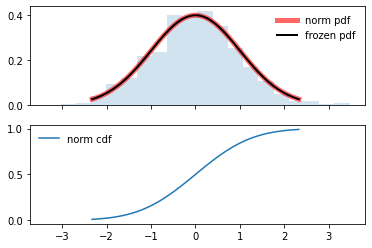

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax1.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()  # frozon pdf
ax1.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = norm.rvs(size=1000)
ax1.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.2)
ax1.legend(loc='best', frameon=False)
ax2.plot(x, norm.cdf(x), label="norm cdf")
ax2.legend(loc='best', frameon=False)
plt.show()

In [ ]:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

True

**Example 6.5**

Find P(-0.5 < z < 1.0).

P = P(z < 1.0) - P(z < -0.5) 

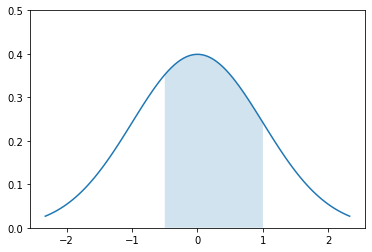

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x))
plt.ylim(0.0, 0.5)
fillx = np.linspace(-0.5, 1.0, 50)
plt.fill_between(fillx, norm.pdf(fillx), alpha=0.2)
plt.show()

In [ ]:
p = norm.cdf(1.0) - norm.cdf(-0.5)
p

0.532807207342556

**Example 6.7**

Find $z_0$

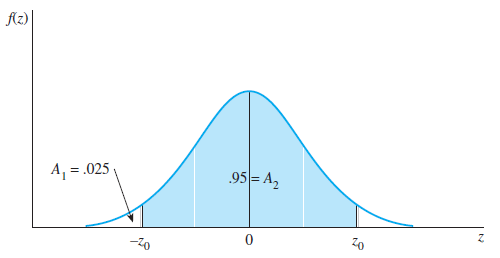

In [ ]:
z0 = norm.ppf(1-0.025)
z0

1.959963984540054

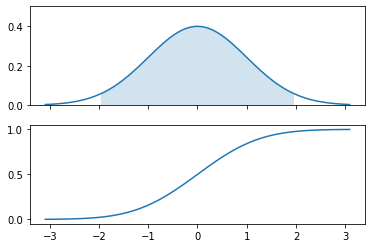

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x = np.linspace(norm.ppf(0.001),
                norm.ppf(0.999), 100)
ax1.plot(x, norm.pdf(x))
ax1.set_ylim(0.0, 0.5)
fillx = np.linspace(-z0, z0, 100)
ax1.fill_between(fillx, norm.pdf(fillx), alpha=0.2)
ax2.plot(x, norm.cdf(x))
plt.show()

**Example 6.8**

$\mu=10, s=2$

Find the probability that x lies between 11 and 13.6.

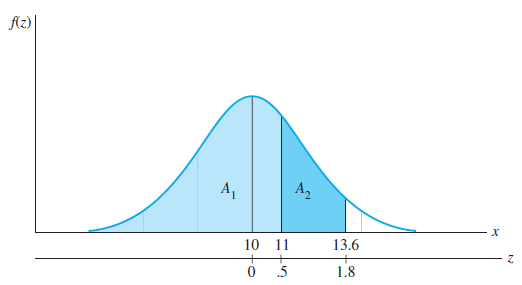

In [ ]:
mu, s = 10, 2

rv = norm(loc=mu, scale=s)
p1 = rv.cdf(13.6) - rv.cdf(11)

z1, z2 = (11-mu)/s, (13.6-mu)/s 
p2 = norm.cdf(z2) - norm.cdf(z1)

p1, p2

(0.2726072196130611, 0.2726072196130611)

**Exercise 6.47 No Shows**

In [ ]:
p=0.9  # 손님이 부도내지 않을 확률
n = 215  # 예약자 수
# 부도내지 않는 손님 수 = X

# X는 베르누이 분포를 따른다.
# P(X<=200)을 구하는 문제이다.

from scipy.stats import binom
binom.cdf(200, n, p)

0.9503576896055657

In [ ]:
n*p, n*(1-p)

(193.5, 21.499999999999996)

In [ ]:
# n이 크고, p가 0이나 1에 너무 가깝지 않다.
# np = 193.5 > 5 and n(1-p) = 21.5 > 5
# 따라서 Normal approximation이 가능하다.
mu = n*p
sigma = np.sqrt(n * p * (1-p))
mu, sigma, norm.cdf(200.5, mu, sigma)  # discrete --> continuous 보정!

(193.5, 4.398863489584554, 0.9442312250874314)